In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

## Functions

In [130]:
def EggsPerSeason(dataSet, cycleName:str, colorSpring='pink', colorSummer='orange', colorAutumn='brown', colorWinter='blue'):
    """
    Graph of a Cycle wherea each season has a different color
    Arguments: 
        dataSet: a DataFrame
        cycleName: a string that identify the cycle
        colorSpring: color for spring data, default pink
        colorSummer: color for spring data, default orange
        colorAutumn: color for autumn data, default brown
        colorWinter: color for winter data, default blue
    """
    data=dataSet.rename(columns={"Date of Laid": "Data", "Laied":"EggsProduced"}) #, "Price(euro/100kg)":"Price"-> to show the market demand on top of the production
    data.Data = pd.to_datetime(data.Data, format = '%d/%m/%Y')

    data['month']=data.Data.dt.month
    dataAutumn = data.loc[(data.month==9)|(data.month==10)|(data.month==11)]
    dataWinter = data.loc[(data.month==12)|(data.month==1)|(data.month==2)]
    dataSpring = data.loc[(data.month==3)|(data.month==4)|(data.month==5)]
    dataSummer = data.loc[(data.month==6)|(data.month==7)|(data.month==8)]


    fig, ax1 = plt.subplots()
    ####ax2=ax1.twinx() -> to show the market demand on top of the production
    #ax1.set_ylim(0,1)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('#Egg', color='black')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))

    ax1.plot(dataAutumn.Data,dataAutumn.EggsProduced, 'x', color=colorAutumn, label="Autumn")

    ax1.plot(dataWinter.Data,dataWinter.EggsProduced,'x', color=colorWinter, label="Winter")

    ax1.plot(dataSpring.Data,dataSpring.EggsProduced,'x', color=colorSpring, label="Spring")

    ax1.plot(dataSummer.Data,dataSummer.EggsProduced,'x', color=colorSummer, label="Summer")


    ####ax2.plot(data.Data, data.Price, 'o', color="black") -> to show the market demand on top of the production
    
    plt.gcf().autofmt_xdate()
    ax1.tick_params(axis='y')
    plt.xticks(rotation=45)
    

    plt.legend()

    plt.title('Eggs per day - '+ cycleName)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [99]:
def AveragePerDays(data, days):
    var = []
    day=0
    sum=0
    for i in data:
        day=day+1
        sum=sum+i
        if day==days:
            day=0
            var.append(sum/days)
            sum=0
    return var

In [123]:
def CompareVariableInCycles(variables, nameVariable, legendLabels=['Y', 'Z', 'A', 'B', 'C'], dayStart=0, dayEnd=1000, averagePerDays=False, numOfDay=7):
    """
    Plot over time the all the data placed in variables.
    Arguments:
        variables: array of all the arrays to plot
        nameVariable: name of the variable
        legendLabels: array of labels to show in legend 
        dayStart: first day to consider in the graph
        dayEnd: last day to consider in the graph
        averagePerDays: True if you want to plot the average over a certain amount of days
        numOfDay: amount of days to regroup
    """
    count=0
    for e in variables:
        e = e[dayStart:dayEnd]
        if(averagePerDays):
            e=AveragePerDays(e, numOfDay)
        plt.plot(e, label=(legendLabels[count]))
        count=count+1
    
    if(averagePerDays):
        plt.title(nameVariable+" comparison - Average over "+str(numOfDay) +" days" )
        plt.xlabel("# of periods of " + str(numOfDay)+ " days in barns")
        plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    else:
        plt.title(nameVariable+" comparison")
        plt.xlabel("Days in barns")
    plt.ylabel(nameVariable)
    plt.legend()
    
    plt.show()

## Importing Datasets

In [135]:
#cronological order
cycleY = pd.read_csv("./Data/Chickens data/CycleY-CleanData021222.csv", sep=";")
cycleZ = pd.read_csv("./Data/Chickens data/CycleZ-CleanData221122.csv", sep=";")
cycleA = pd.read_csv("./Data/Chickens data/CycleA-CleanData211122.csv", sep=";")
cycleB = pd.read_csv("./Data/Chickens data/CycleB-CleanData211122.csv", sep=";")
cycleC = pd.read_csv("./Data/Chickens data/CycleC-CleanData021222.csv", sep=";")

Importing Market info and try to do stuff:

In [ ]:
eggs_price = pd.read_csv("Data\EggsData\eggsPrice.csv", sep=";")

eggs_price = eggs_price[eggs_price["Price(euro/100kg)"]<200]
eggs_price[eggs_price['FarmingMethod'] == "Cage"][['ReferencePeriod', 'Price(euro/100kg)']]

In [ ]:
##test to merge market demand with chiken data
cycleA = pd.merge(cycleA, eggs_price[eggs_price['FarmingMethod'] == "Cage"][['ReferencePeriod', 'Price(euro/100kg)']], left_on='Date of Laid', right_on='ReferencePeriod', how='outer')
cycleA.pop('ReferencePeriod')
cycleA['Price(euro/100kg)'] = cycleA['Price(euro/100kg)'].fillna(method='bfill')

'''
cycleB = pd.merge(cycleB, eggs_price[eggs_price['FarmingMethod'] == "Cage"][['ReferencePeriod', 'Price(euro/100kg)']], left_on='Date of Laid', right_on='ReferencePeriod', how='outer')
cycleB.pop('ReferencePeriod')
cycleB['Price(euro/100kg)'] = cycleB['Price(euro/100kg)'].fillna(method='bfill')

cycleZ = pd.merge(cycleZ, eggs_price[eggs_price['FarmingMethod'] == "Cage"][['ReferencePeriod', 'Price(euro/100kg)']], left_on='Date of Laid', right_on='ReferencePeriod', how='outer')
cycleZ.pop('ReferencePeriod')
cycleZ['Price(euro/100kg)'] = cycleZ['Price(euro/100kg)'].fillna(method='bfill')
'''

## Graph Analysis

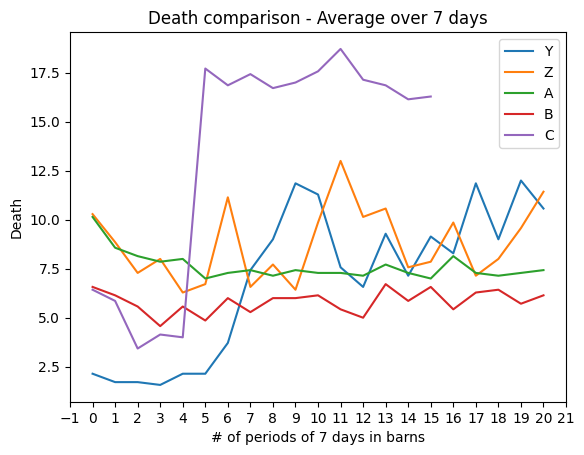

In [136]:
CompareVariableInCycles([cycleY.Death, cycleZ.Death, cycleA.Death, cycleB.Death, cycleC.Death], "Death", dayEnd=150, averagePerDays=True,numOfDay=7)

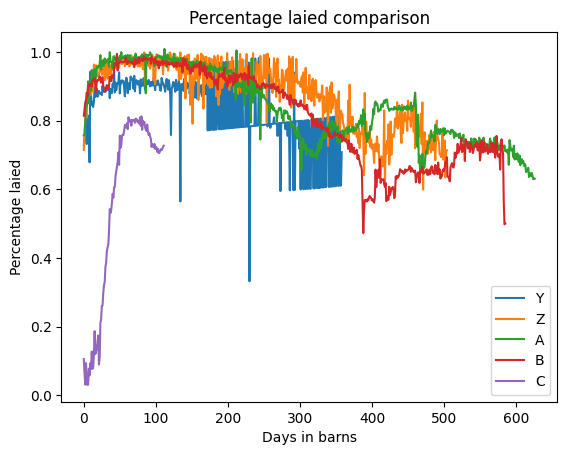

In [137]:
CompareVariableInCycles([cycleY.Laied, cycleZ.Laied, cycleA.Laied, cycleB.Laied, cycleC.Laied], "Percentage laied")

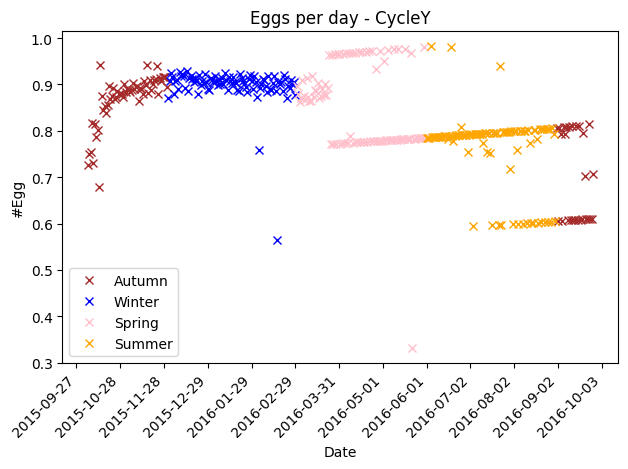

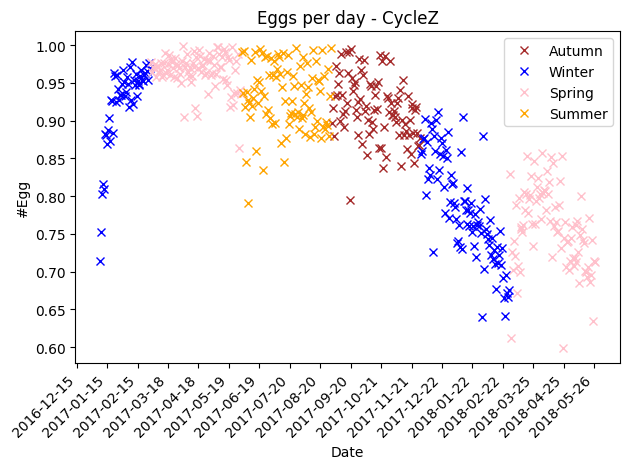

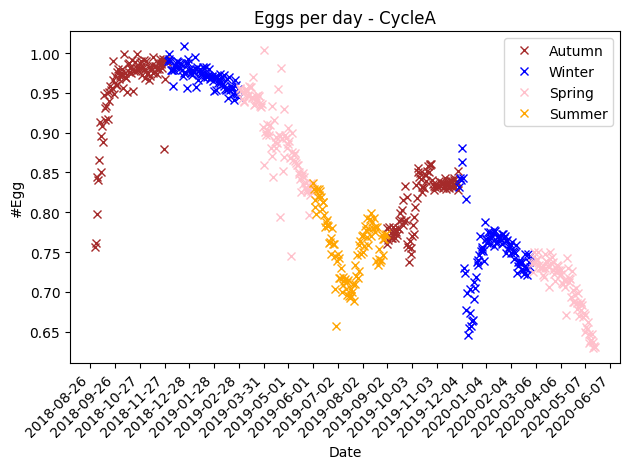

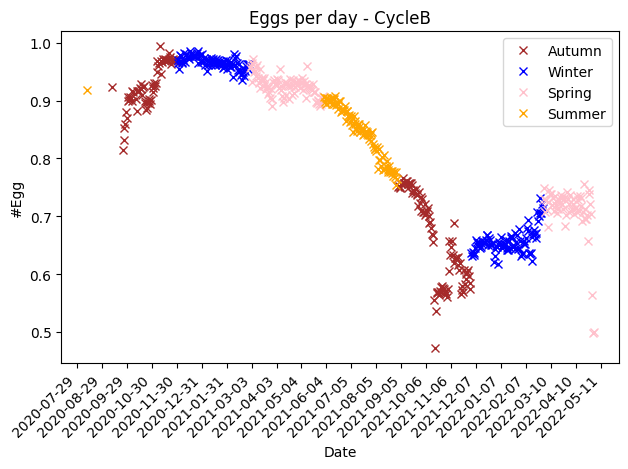

In [138]:
EggsPerSeason(cycleY, 'CycleY') 
EggsPerSeason(cycleZ, 'CycleZ')
EggsPerSeason(cycleA, 'CycleA')
EggsPerSeason(cycleB, 'CycleB')